In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("dataset.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1000 non-null   object 
 1   latitude   1000 non-null   float64
 2   longitude  1000 non-null   float64
 3   time       1000 non-null   object 
 4   date       1000 non-null   object 
 5   cluster    1000 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [3]:
df.head()

,name,latitude,longitude,time,date
0,Lucky,30.024195,78.043919,22:01,01-04-2022
1,Priti,28.343027,76.316796,12:40,01-04-2022
2,Akshay,29.499620,78.640846,08:13,01-04-2022
3,Bhanu,28.833672,76.184851,19:08,01-04-2022
4,Bhanu,27.263240,78.598454,01:46,01-04-2022


In [4]:
df.describe()

,latitude,longitude
count,1000.000000,1000.000000
mean,28.578107,77.185089
std,0.895173,1.026912
min,26.880908,75.201212
25%,27.864982,76.317857
50%,28.581108,77.187492
75%,29.288874,78.050183
max,30.424660,79.239135


In [5]:
df['name'].unique()

array(['Lucky', 'Priti', 'Akshay', 'Bhanu', 'Riya', 'Rohini', 'Pulkit',
       'Rohit', 'Ashu', 'Ruhi'], dtype=object)

## Exploratory Data Analysis

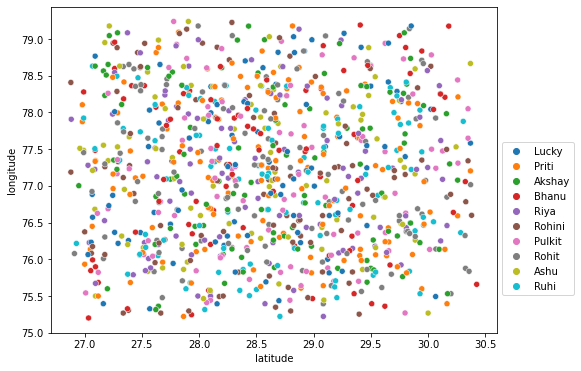

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='name')
plt.legend(bbox_to_anchor= [1, 0.6])

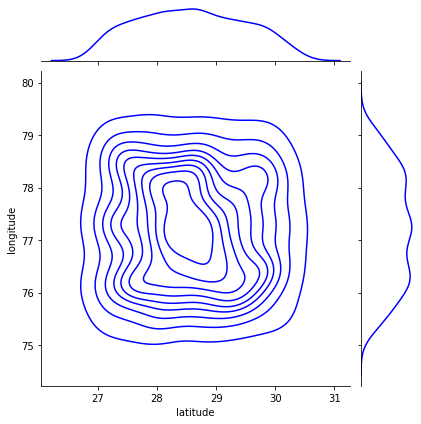

In [7]:
sns.jointplot(x='latitude', y='longitude', data=df, color='blue', kind='kde')

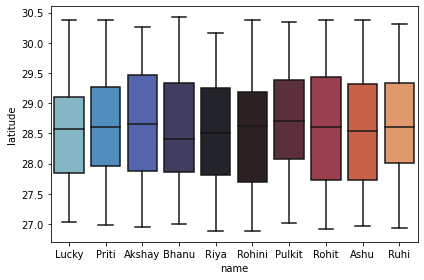

In [12]:
sns.boxplot(x='name', y= 'latitude', data = df, palette = 'icefire')
plt.tight_layout()

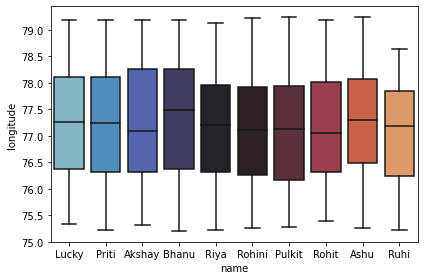

In [13]:
sns.boxplot(x='name',y='longitude',data=df, palette='icefire')
plt.tight_layout()

## Defining the Model

In [16]:
epsilon = 0.0018288 # this is the radial distance equivalent of 6 kms
model = DBSCAN(eps = epsilon, min_samples = 2, metric = 'haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


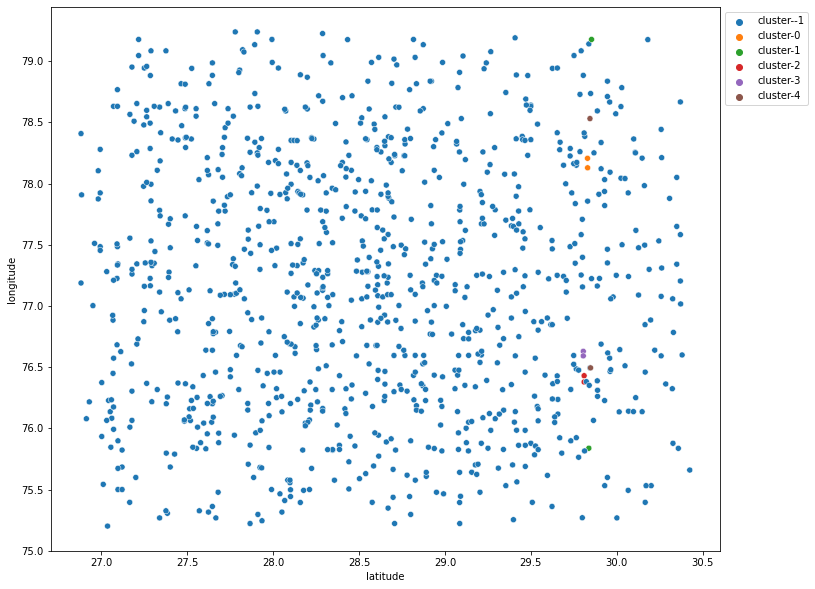

In [20]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.savefig('filename.jpg',bbox_inches='tight', dpi=250)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


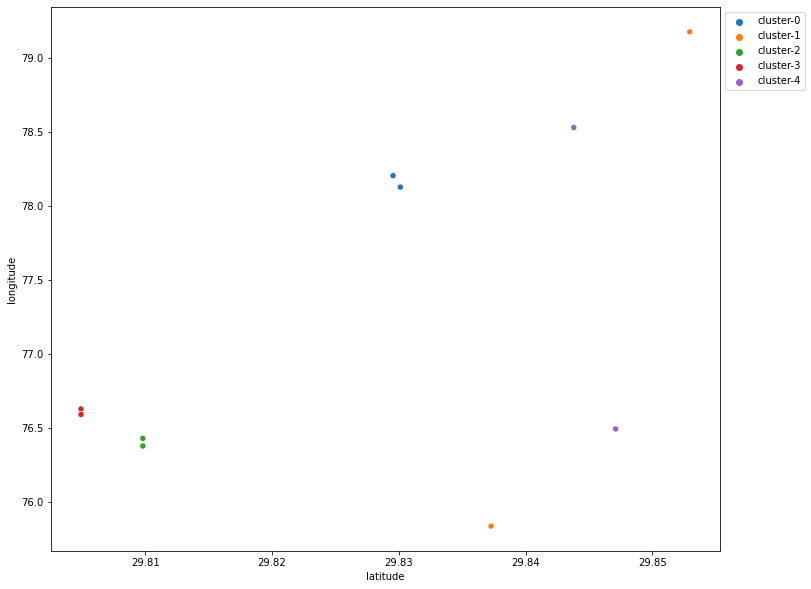

In [22]:
ids = df[(df['cluster'] == -1)].index
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])
plt.savefig('filename2.jpg',bbox_inches='tight', dpi=250)

In [29]:
def get_high_risk_names(input_name):
    df = pd.read_csv("dataset.csv")
    epsilon = 0.0018288 # this is the radial distance equivalent of 6 kms
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    uniq_name_clusters = []
    for i in range(len(df)):
        if df['name'][i] == input_name:
            if df['cluster'][i] in uniq_name_clusters:
                pass
            else:
                uniq_name_clusters.append(df['cluster'][i])
    
    high_risk_names = []
    for cluster in uniq_name_clusters:
        if cluster != -1:
            names_in_cluster = df.loc[df['cluster'] == cluster, 'name']
            for i in range(len(names_in_cluster)):
                member_name = names_in_cluster.iloc[i]
                if (member_name not in high_risk_names) and (member_name != input_name):
                    high_risk_names.append(member_name)
                else:
                    pass
    return high_risk_names

In [32]:
get_high_risk_names('Riya')

['Rohit', 'Pulkit']